In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans

In [ ]:
tracks_df = pd.read_csv('MATCHED_TRACKS.csv')
featured_df = pd.read_csv('MATCHED_FEATUREDS.csv')
albums_data = pd.read_csv('MATCHED_ALBUMS.csv')
final_pitchfork_scrape_data = pd.read_csv('final_pitchfork_scrape.csv')
print('MATCHED TRACKS')
print(tracks_df.columns)
print('\nMATCHED FEATUREDS')
print(featured_df.columns)
featured_df

MATCHED TRACKS
Index(['pitchfork_id', 'track_id', 'artist_id', 'artist_name', 'duration',
       'explicit', 'name', 'track_number', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence'],
      dtype='object')

MATCHED FEATUREDS
Index(['pitchfork_id', 'track_id', 'artist_name', 'popularity', 'artist_id',
       'followers', 'genres'],
      dtype='object')


,pitchfork_id,track_id,artist_name,popularity,artist_id,followers,genres
0,2,11yerux7AdpTkifdftaafY,Eve Adams,18,1VX1sRrfeZCz2lpefE8gFo,538,NaN
1,2,6zp96PrX5waWE21ssl4w7k,Eve Adams,18,1VX1sRrfeZCz2lpefE8gFo,538,NaN
2,2,4ocVMqXGbeSDXfdqQQwF8A,Eve Adams,18,1VX1sRrfeZCz2lpefE8gFo,538,NaN
3,2,5CmiOzpyVY9xpRsQCjcC7I,Eve Adams,18,1VX1sRrfeZCz2lpefE8gFo,538,NaN
4,2,0gQRcxQEpAoblY2zpMTqXd,Eve Adams,18,1VX1sRrfeZCz2lpefE8gFo,538,NaN
...,...,...,...,...,...,...,...
214591,22296,1TfbzGiri83Z6R192YrZuw,Matthew Shipp With William Parker,0,0RsbHk5LeYXGTaR4CaqvTh,28,NaN
214592,22296,2Ly0HBQPbIMF1VTyTnHfst,Matthew Shipp With William Parker,0,0RsbHk5LeYXGTaR4CaqvTh,28,NaN
214593,22296,14FdKcyMoNLaQRx8i0f3kC,Matthew Shipp With William Parker,0,0RsbHk5LeYXGTaR4CaqvTh,28,NaN
214594,22296,0p2kZ6GKnvHBkjhuyy4rX7,Matthew Shipp With William Parker,0,0RsbHk5LeYXGTaR4CaqvTh,28,NaN


In [ ]:

simple_tracks_df = tracks_df.iloc[:,np.r_[1,4:6,8:21]]
simple_tracks_df

,track_id,duration,explicit,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,11yerux7AdpTkifdftaafY,165245,False,17,0.664000,0.482,0.194,0.123000,10.0,0.1020,-13.203,1.0,0.0401,116.539,3.0,0.2070
1,6zp96PrX5waWE21ssl4w7k,212754,False,15,0.763000,0.435,0.273,0.000000,9.0,0.0761,-8.716,1.0,0.0275,101.825,3.0,0.2030
2,4ocVMqXGbeSDXfdqQQwF8A,240374,False,17,0.881000,0.468,0.243,0.692000,2.0,0.0895,-14.452,0.0,0.0293,118.566,3.0,0.0493
3,5CmiOzpyVY9xpRsQCjcC7I,123618,False,12,0.656000,0.633,0.290,0.000000,2.0,0.0857,-11.681,0.0,0.0484,94.360,4.0,0.5560
4,0gQRcxQEpAoblY2zpMTqXd,290006,False,13,0.779000,0.504,0.226,0.432000,4.0,0.1110,-12.477,1.0,0.0378,119.406,3.0,0.1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189451,5M28EpCTe9eKFs1wcC2yhr,171200,False,11,0.008770,0.376,0.664,0.000017,4.0,0.1080,-7.605,1.0,0.0303,106.127,4.0,0.3840
189452,16FpUTNIM0Pra9DlUQJxQB,252346,False,11,0.001380,0.401,0.850,0.000696,4.0,0.0774,-8.379,1.0,0.0579,123.587,4.0,0.3080
189453,5yjL8aCTEamn0iTyQBKXIB,160120,False,10,0.036100,0.323,0.933,0.000425,4.0,0.0460,-7.893,1.0,0.0705,116.437,4.0,0.6140
189454,6ntox6DItmjubT8AjYetuJ,183800,False,11,0.001690,0.449,0.687,0.000350,4.0,0.1020,-7.997,1.0,0.0299,130.989,4.0,0.5940


In [ ]:
full_featured_df = pd.merge(featured_df, simple_tracks_df, how='inner', on='track_id', validate='m:1')
full_featured_df = full_featured_df.rename(columns={'popularity_x': 'artist_popularity', 'popularity_y': 'track_popularity'})
full_featured_df[full_featured_df['pitchfork_id'] == 3]

,pitchfork_id,track_id,artist_name,artist_popularity,artist_id,followers,genres,duration,explicit,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
11,3,1v5PRyfI9ZOaJbHEFmxfQO,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,313469,True,37,0.77300,0.419,0.703,0.000000,6.0,0.0882,-9.467,0.0,0.5950,69.304,3.0,0.5990
12,3,1v5PRyfI9ZOaJbHEFmxfQO,SaysoTheMac,40,0doHBzLLsQPvw51PMryi0k,4361,cali rap,313469,True,37,0.77300,0.419,0.703,0.000000,6.0,0.0882,-9.467,0.0,0.5950,69.304,3.0,0.5990
13,3,3i5KWqbOjqI66yBAFr7mGx,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,190000,True,48,0.13600,0.833,0.463,0.000000,8.0,0.1180,-9.186,1.0,0.2400,96.012,4.0,0.5530
14,3,6J8xN1O90vRQjw7OAzJlzb,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,110000,True,36,0.00312,0.737,0.608,0.000000,9.0,0.1950,-7.715,1.0,0.1310,95.943,4.0,0.3110
15,3,6J8xN1O90vRQjw7OAzJlzb,Damon Elbert,25,2WXYTbQLAhC8jhJLsw5nIi,11150,NaN,110000,True,36,0.00312,0.737,0.608,0.000000,9.0,0.1950,-7.715,1.0,0.1310,95.943,4.0,0.3110
16,3,7EbHP0pY8rLevs85C72xk9,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,178125,True,43,0.09740,0.748,0.522,0.000035,2.0,0.3180,-9.149,1.0,0.2300,96.010,4.0,0.4430
17,3,5iKWcHHcIqnYIwWIWRLoY8,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,149387,True,40,0.12600,0.873,0.547,0.000000,8.0,0.0547,-8.183,1.0,0.4050,98.010,4.0,0.8250
18,3,54UE9FbTEB1ktAeNvnbWLf,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,172800,True,36,0.05100,0.758,0.470,0.000000,0.0,0.1610,-6.440,0.0,0.0835,100.019,4.0,0.0719
19,3,54UE9FbTEB1ktAeNvnbWLf,Icewear Vezzo,59,1ZbmerOthZbxz5eR3c9Mn1,48569,cali rap|detroit hip hop|detroit trap,172800,True,36,0.05100,0.758,0.470,0.000000,0.0,0.1610,-6.440,0.0,0.0835,100.019,4.0,0.0719
20,3,1nqedVCj1FSxHktwaiK5PK,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,220800,True,38,0.03900,0.504,0.586,0.000000,1.0,0.2840,-7.211,1.0,0.3250,99.311,4.0,0.4540


# Ayush's world

In [ ]:

grouped = full_featured_df.groupby('artist_name')
#df_min = grouped.agg('min').reset_index()
#df_max = grouped.agg('max').reset_index()               
df_mean = grouped.agg('mean').reset_index()
df_std = grouped.agg('std').reset_index()
df_var = grouped.agg('var').reset_index()
df_med = grouped.agg('median').reset_index()




In [ ]:
df_mean

,artist_name,pitchfork_id,artist_popularity,followers,duration,explicit,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Superior,2103.000000,22.0,487.0,1.758970e+05,1.0,6.000000,0.319866,0.456200,0.787800,0.000682,4.500000,0.234940,-4.697400,0.400000,0.138150,112.581200,4.000000,0.374350
1,!!!,9562.390244,49.0,129870.0,2.722135e+05,0.0,19.951220,0.082416,0.737780,0.784024,0.233407,5.670732,0.186384,-7.350232,0.560976,0.081300,119.354866,4.000000,0.645415
2,$NOT,250.000000,79.0,620945.0,1.418665e+05,1.0,58.833333,0.278750,0.803583,0.563250,0.000196,5.000000,0.147267,-8.323500,0.500000,0.260708,104.152750,4.000000,0.516108
3,$ean Wire,1645.000000,26.0,57009.0,1.820930e+05,1.0,27.000000,0.167000,0.786000,0.579000,0.000000,10.000000,0.073300,-5.892000,0.000000,0.132000,125.077000,4.000000,0.576000
4,$hirak,2706.000000,55.0,66951.0,1.312850e+05,1.0,35.000000,0.001610,0.841000,0.451000,0.455000,9.000000,0.128000,-8.857000,1.000000,0.093100,110.075000,5.000000,0.326000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14960,Ólöf Arnalds,12087.000000,34.0,17313.0,2.097158e+05,0.0,3.700000,0.949200,0.527900,0.142520,0.119995,5.100000,0.117610,-13.826600,0.700000,0.043870,123.108600,4.000000,0.435800
14961,Ø,8103.000000,18.0,5928.0,4.414517e+05,1.0,6.111111,0.761444,0.364889,0.089580,0.608911,6.444444,0.133233,-30.272000,0.444444,0.079467,114.245889,3.222222,0.070711
14962,Øyvind Morken,5479.000000,14.0,506.0,3.813890e+05,0.0,6.000000,0.042900,0.792000,0.740000,0.869000,4.000000,0.177000,-10.724000,0.000000,0.073600,123.988000,4.000000,0.508000
14963,Ü,6257.000000,0.0,1.0,1.183503e+06,0.0,2.000000,0.499000,0.619000,0.915000,0.850000,4.000000,0.211000,-9.161000,0.000000,0.140000,118.040000,4.000000,0.289000


In [ ]:
row_mean = df_mean[df_mean.artist_name == '2pac'][0]
row_mean

KeyError: ignored

In [ ]:
genre_feats_genres.head()

NameError: ignored

In [ ]:
genre_feats = full_featured_df.groupby('artist_name')
genre_feats_genres = genre_feats['genres']
genre_feats_genres.head()

genre_counts = {}
q = 0
for obj in genre_feats_genres:
  x = obj[0]
  y = obj [1]
  y_list = y.tolist()
  for i in y_list :
    x = str(i).split('|')
    
    for genre in x :
      if genre in genre_counts:
        continue 
      else :
        genre_counts[genre] = q
        q += 1

#print(genre_counts)

processed_array = np.zeros([len(genre_feats_genres), len(genre_counts)])
row = 0
#row_mean = df_mean[df_mean.artist_name == '2pac'].iloc[0]
for obj in genre_feats_genres :
  z = obj[0]
  y = obj [1]
  append = []
  print(z)
  row_mean = df_mean[df_mean.artist_name == z].iloc[0]
  row_var = df_var[df_var.artist_name == z].iloc[0]
  row_median = df_mean[df_mean.artist_name == z].iloc[0]
  row_std = df_mean[df_mean.artist_name == z].iloc[0]
  
  append.append(row_mean.acousticness)
  append.append(row_mean.energy)
  append.append(row_mean.instrumentalness)
  append.append(row_mean.liveness)
  append.append(row_mean.speechiness)
  append.append(row_mean.tempo)
  append.append(row_mean.valence)

  append.append(row_var.acousticness)
  append.append(row_var.energy)
  append.append(row_var.instrumentalness)
  append.append(row_var.liveness)
  append.append(row_var.speechiness)
  append.append(row_var.tempo)
  append.append(row_var.valence)

  append.append(row_median.acousticness)
  append.append(row_median.energy)
  append.append(row_median.instrumentalness)
  append.append(row_median.liveness)
  append.append(row_median.speechiness)
  append.append(row_median.tempo)
  append.append(row_median.valence)

  append.append(row_std.acousticness)
  append.append(row_std.energy)
  append.append(row_std.instrumentalness)
  append.append(row_std.liveness)
  append.append(row_std.speechiness)
  append.append(row_std.tempo)
  append.append(row_std.valence)
  j = 0
  for thing in append:
   if np.isnan(thing):
    processed_array[row, j] = 0
   else :
    processed_array[row, j] = thing
  
  j+= 1

  
  y_list = y.tolist()
  for i in y_list :
    x = str(i).split('|')
   
    for genre in x :
       processed_array[row, genre_counts[genre]] = 1
  #print(z)
  
  row += 1
  #
  #print(processed_array)




Streaming output truncated to the last 5000 lines.
Peter Zummo
Petey Pablo
Petite Noir
Petra
Petra Glynt
Petracovich
Petter Eldh
Petter Winnberg
Peverelist
Phantogram
Phantom Planet
Phantom Posse
Phantom Tollbooth
Phantoms
Pharaoh Overlord
Pharaohs
Pharmakon
Pharoah Sanders
Pharoahe Monch
Pharrell Williams
Phase Fatale
Phaseone
Phat Kat
Phats Bossalini
Phew
Phi Life Cypher
Phil Adé
Phil Beaudreau
Phil Cook
Phil Da Agony
Phil Elverum
Phil Manzanera
Phil Ochs
Phile Ade
Philip Glass
Philip Jeck
Philip Selway
Philip Sheppard
Phill Niblock
Philthy Rich
Phish
Phoebe
Phoebe Bridgers
Phoebe Killdeer
Phoebe Tolmer
Phoelix
Phoenix
Phoenix Orion
Phon
Phon.o
Phonem
Phonophani
Phonte
Phonte Coleman
Phora
Phosphorescent
Photay
Photek
Photon Band
Phthalocyanine
Phum Viphurit
Physical Therapy
Phèdre
Pia Ercole
Piakhan
Piana
Piano Magic
Pianos Become The Teeth
Picastro
Pickleboy
Pickwick
Pictureplane
Pieces of Peace
Pier Luigi Andreoni
Pierre Botardo
Pierre Crube
Pierre de Reeder
Pieter Bourke
Pig Dest

In [ ]:
processed_array


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64541463, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51610833, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.508     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

For n_clusters = 2, silhouette score is 0.3750272633271932)
For n_clusters = 3, silhouette score is 0.37885246554835555)
For n_clusters = 4, silhouette score is 0.3709583929988639)
For n_clusters = 5, silhouette score is 0.35928006493294534)
For n_clusters = 6, silhouette score is 0.376034852994195)
For n_clusters = 7, silhouette score is 0.3728065496310861)
For n_clusters = 8, silhouette score is 0.36177993516119183)
For n_clusters = 9, silhouette score is 0.36994261293784336)
For n_clusters = 10, silhouette score is 0.3406619538090348)
For n_clusters = 11, silhouette score is 0.3153520053122719)
For n_clusters = 12, silhouette score is 0.2005347882336241)
For n_clusters = 13, silhouette score is 0.20532458916728616)
For n_clusters = 14, silhouette score is 0.2059786823739919)
For n_clusters = 15, silhouette score is 0.20736760663123333)
For n_clusters = 16, silhouette score is 0.2082138009059274)
For n_clusters = 17, silhouette score is 0.19926394317709015)
For n_clusters = 18, silho

ValueError: ignored

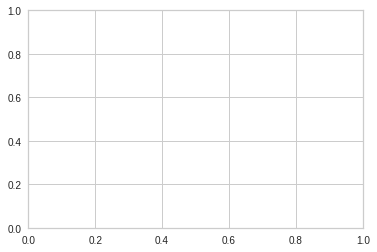

In [ ]:
#kmeans = KMeans(n_clusters=49, random_state=0).fit(processed_array)
#labels = kmeans.predict(processed_array)
#print(labels.tolist())
from sklearn.metrics import silhouette_score
number=50
scores = []
xaxis = []
range(number +2)

number_of_rows = processed_array.shape[0]
random_indices = np.random.choice(number_of_rows, size=5000, replace=False)
random_rows = processed_array[random_indices, :]
for n_clusters in range(number):
  xaxis.append(n_clusters + 2)
  kmeans = KMeans(n_clusters=n_clusters+2, random_state=0).fit(random_rows)
  labels = kmeans.predict(random_rows)

  score = silhouette_score(random_rows, labels)
  scores.append(score)
  print("For n_clusters = {}, silhouette score is {})".format(n_clusters +2, score))

plt.figure()
plt.plot(range(2, 102), scores)
plt.show()

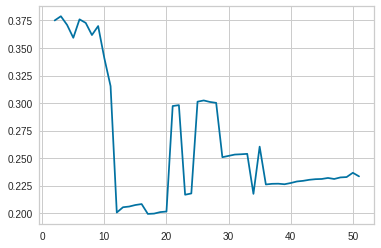

In [ ]:
plt.figure()
plt.plot(range(2, 52), scores)
plt.show()

In [ ]:
full_df = full_featured_df.drop('track_id', 1)
full_df = full_df.drop('artist_popularity', 1)
full_df = full_df.drop('artist_id', 1)
full_df = full_df.drop('followers', 1)
full_df = full_df.drop('duration', 1)
full_df = full_df.drop('explicit', 1)
full_df = full_df.drop('artist_name', 1)
full_df = full_df.drop('pitchfork_id', 1)
full_df = full_df.drop('genres', 1)
full_df = full_df.drop('track_popularity', 1)
full_df


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.664,0.482,0.194,0.123,10.0,0.1020,-13.203,1.0,0.0401,116.539,3.0,0.2070
1,0.763,0.435,0.273,0.000,9.0,0.0761,-8.716,1.0,0.0275,101.825,3.0,0.2030
2,0.881,0.468,0.243,0.692,2.0,0.0895,-14.452,0.0,0.0293,118.566,3.0,0.0493
3,0.656,0.633,0.290,0.000,2.0,0.0857,-11.681,0.0,0.0484,94.360,4.0,0.5560
4,0.779,0.504,0.226,0.432,4.0,0.1110,-12.477,1.0,0.0378,119.406,3.0,0.1490
...,...,...,...,...,...,...,...,...,...,...,...,...
214591,0.911,0.294,0.265,0.851,2.0,0.0749,-21.347,1.0,0.0450,101.242,4.0,0.1240
214592,0.852,0.454,0.234,0.865,2.0,0.0999,-20.789,1.0,0.0398,111.176,3.0,0.4460
214593,0.847,0.398,0.220,0.689,2.0,0.1110,-21.989,1.0,0.0406,64.374,4.0,0.4850
214594,0.901,0.402,0.170,0.716,8.0,0.0869,-21.601,1.0,0.0476,77.934,3.0,0.3340


For n_clusters = 2, silhouette score is 0.5114094443436047)
For n_clusters = 3, silhouette score is 0.49584282295651605)
For n_clusters = 4, silhouette score is 0.43378487817033495)
For n_clusters = 5, silhouette score is 0.405737584215382)
For n_clusters = 6, silhouette score is 0.3737734264389627)
For n_clusters = 7, silhouette score is 0.37820171243245976)
For n_clusters = 8, silhouette score is 0.34105092988467944)
For n_clusters = 9, silhouette score is 0.32068643851031536)
For n_clusters = 10, silhouette score is 0.32268312113210496)
For n_clusters = 11, silhouette score is 0.30730211947042346)
For n_clusters = 12, silhouette score is 0.2806298405354611)
For n_clusters = 13, silhouette score is 0.28696424403097287)
For n_clusters = 14, silhouette score is 0.2865838036425882)
For n_clusters = 15, silhouette score is 0.2695616667004845)
For n_clusters = 16, silhouette score is 0.2738546947735242)
For n_clusters = 17, silhouette score is 0.27257697371656353)
For n_clusters = 18, sil

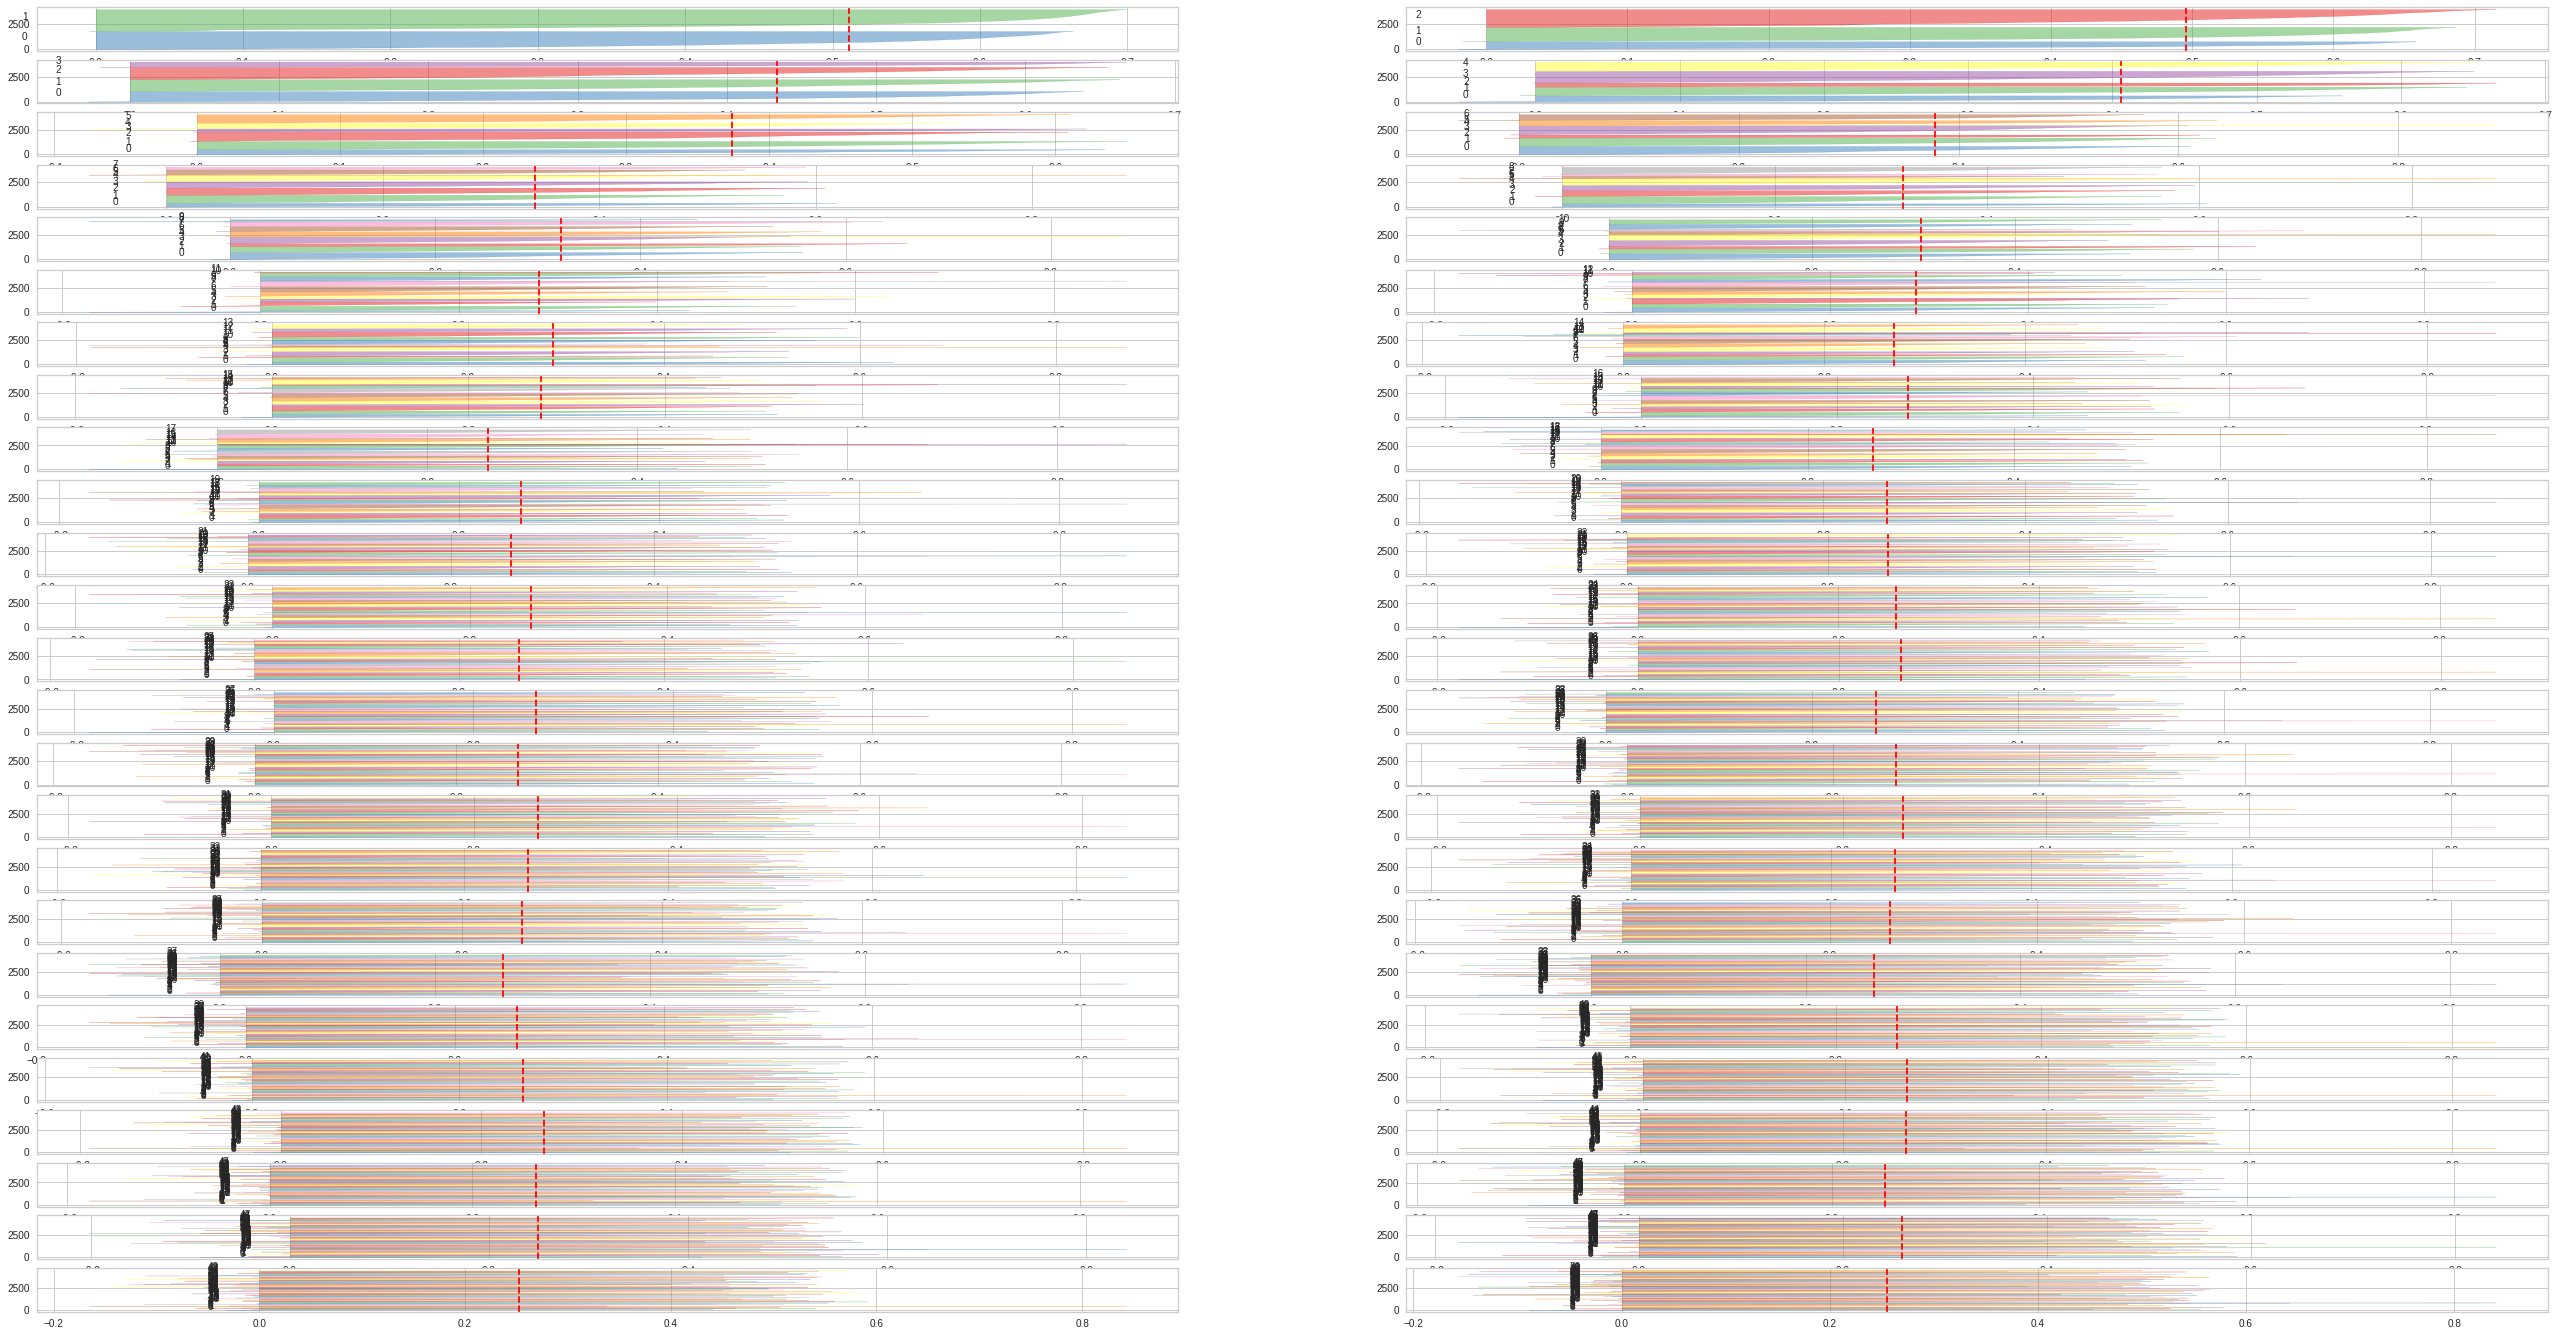

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from yellowbrick.cluster import SilhouetteVisualizer
number=50
df = full_df.sample(4000)
scores = []
xaxis = []
range(number +2)

fig, ax = plt.subplots(25, 2, figsize=(45,24), squeeze = False)

for n_clusters in range(number):
  xaxis.append(n_clusters + 2)
  kmeans = KMeans(n_clusters=n_clusters+2, random_state=0).fit(df)
  labels = kmeans.predict(df)

  q, mod = divmod(n_clusters+2, 2)

  score_avg = silhouette_score(df, labels)
  scores.append(score_avg)
  print("For n_clusters = {}, silhouette score is {})".format(n_clusters +2, score_avg))


  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(df)



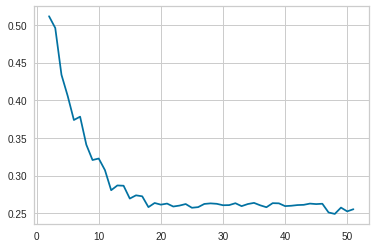

In [ ]:
plt.figure()
plt.plot(range(2, 52), scores)
plt.show()

In [ ]:

full_featured_df.groupby(['pitchfork_id'])
a = full_featured_df.track_id.unique()
full_featured_df.groupby(['pitchfork_id', 'genre_label']).agg('count').loc[3:4]

KeyError: ignored

In [ ]:
full_featured_df


kmeans = KMeans(n_clusters=21, random_state=0).fit(full_df)
labels = kmeans.predict(full_df)
print(labels.tolist())

[9, 1, 9, 1, 9, 9, 16, 4, 9, 7, 19, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 17, 5, 4, 4, 20, 8, 6, 6, 4, 7, 5, 4, 4, 14, 13, 14, 14, 14, 14, 6, 11, 14, 20, 6, 14, 14, 2, 20, 20, 20, 16, 3, 17, 17, 3, 19, 4, 17, 18, 3, 1, 7, 1, 2, 14, 16, 9, 9, 9, 9, 9, 9, 14, 14, 18, 18, 2, 17, 7, 7, 7, 0, 8, 8, 18, 7, 8, 6, 8, 5, 16, 16, 15, 7, 7, 2, 13, 20, 13, 13, 13, 13, 13, 13, 2, 2, 18, 18, 15, 15, 18, 13, 13, 7, 7, 7, 15, 15, 15, 15, 7, 15, 7, 7, 18, 13, 1, 0, 0, 11, 0, 17, 17, 1, 1, 9, 9, 13, 13, 19, 19, 20, 20, 14, 14, 9, 9, 13, 16, 5, 10, 2, 16, 2, 16, 18, 16, 16, 18, 18, 18, 19, 19, 17, 17, 17, 0, 17, 17, 17, 13, 19, 0, 1, 1, 18, 19, 9, 9, 18, 2, 0, 18, 15, 19, 17, 0, 18, 18, 1, 9, 14, 18, 1, 6, 0, 19, 9, 9, 0, 9, 14, 3, 0, 9, 7, 8, 9, 4, 14, 6, 4, 6, 10, 14, 4, 9, 15, 14, 10, 11, 20, 6, 9, 14, 15, 14, 2, 1, 17, 17, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 14, 14, 16, 16, 2, 2, 1, 1, 0, 1, 4, 11, 3, 4, 11, 13, 13, 13,

In [ ]:
full_featured_df['genre_labels'] = pd.Series(labels)
full_featured_df.to_csv("ayushABitchREAL.csv", index=False)

In [ ]:
full_featured_df['genre_labels'] = pd.Series(labels)
full_featured_df = full_featured_df.drop_duplicates(subset=['track_id'])

idx = pd.IndexSlice
a = full_featured_df.groupby(['pitchfork_id', 'genre_labels']).agg('count')
#a = a.reset_index()

#a.drop(["track_id", "artist_name"])

#a = a[['pitchfork_id','genre_labels', 'track_id']]
#a = a.groupby(['pitchfork_id', 'genre_labels'])
#a['genre_count'] = a['track_id']
#a = a.drop(['track_id'], axis=1)
#genre_one = a.loc[idx[:,'0'],:]
#genre_one
ahh = pd.merge(albums_data, final_pitchfork_scrape_data, on='pitchfork_id')
for i in range(0, 21):
  genre_i = a.loc[idx[:, i],:]
  genre_i['genre_' +str(i)+ '_pct'] = genre_i['track_id']
  if i == 0 :
    ay = pd.merge(ahh, genre_i['genre_' +str(i)+ '_pct'], on='pitchfork_id', how='left')
  else :
    ay = pd.merge(ay, genre_i['genre_' +str(i)+ '_pct'], on='pitchfork_id', how='left')

  ay['genre_' +str(i)+ '_pct'].replace({np.NaN: 0.0}, inplace=True)

  ay['genre_' +str(i)+ '_pct'] = 100 * ay['genre_' +str(i)+ '_pct'] / ay['total_tracks']

ay.to_csv("ColinisCool.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
aimport random
from sklearn.metrics.cluster import homogeneity_score
j = 0



while j <= 9 :
  print("########################################")
  q = random.randint(0,49)
  i = 0
  for t in range(len(labels)) :
    #print(t)
    if labels[t] == q :
      genre = full_featured_df['genres']
      print(genre[t])
    #x = obj[0]
    #y = obj [1]
    #y_list = y.tolist()
    #if labels[i] == q:
      #print(y_list)
    i +=1
  print(q)
  print("########################################")
  j+=1
  print("~~~~~~~~~~~~~~~~~~~~~~~`")
  print(j)
  print("~~~~~~~~~~~~~~~~~~~~~~~`")

Streaming output truncated to the last 5000 lines.
deep indie rock
english indie rock
english indie rock
english indie rock
omaha indie
experimental indie|experimental indie rock
canadian indie|emo|folk punk|indie pop|indie rock|manitoba indie
canadian indie
deep indie pop
deep acoustic pop|dublin indie
chamber pop|irish singer-songwriter
british singer-songwriter
nan
dance-punk|garage rock revival
dance-punk|garage rock revival
folktronica|sheffield indie
nan
alternative rock|art pop|art rock|bay area indie|dream pop|escape room|experimental|experimental pop|experimental rock|freak folk|grave wave|indie rock|modern rock|new rave|noise pop
norman ok indie
outsider
outsider
outsider
abstract hip hop|alternative hip hop
nan
nan
freak folk|new weird america
doom metal|gaian doom|psychedelic doom|retro metal|space rock|stoner metal|stoner rock|swedish doom metal|swedish stoner rock
noise punk|noise rock
noise punk|noise rock
experimental indie rock
philly indie
art punk|garage pop|noise ro

In [ ]:

#genre_feats_unique = genre_feats.unique()
#genre_feats_unique
genre_counts = {}
i = 0
j = 0
q = 0
k = 0
for obj in genre_feats_genres:
  z = obj[0]
  y = obj[1]
  #print(type(q))
  p = str(y).split('|')
  #print(obj)
  if p[0] == 'NaN':
    q += 1
  elif len(p) == 1:
    i += 1
  elif len(p) == 2 :
    j +=1
  else :
    k += 1
  for genre in p :
    if genre in genre_counts:
      genre_counts[genre] += 1
    else :
      genre_counts[genre] = 1

print(q)
print(i)
print(j)
print(k)
print(len(genre_feats))

genre_counts_restricted = genre_counts

#print(genre_counts['conscious hip hop'])

for key in list(genre_counts_restricted.keys()):
  if genre_counts_restricted[key] <= 9 :
   del genre_counts_restricted[key]

#genre_counts_restricted
df = pd.DataFrame(list(genre_counts_restricted.items()),columns = ['genre','counts']) 
print(genre_counts_restricted.items())
df.describe()
#plt.bar(range(len(genre_counts_restricted)), list(genre_counts_restricted.values()), align='center')
#plt.xticks(range(len(genre_counts_restricted)), list(genre_counts_restricted.keys()))

#plt.show()

0
374
29
1179
1582
dict_items([('underground hip hop', 77), ('vapor trap\nName: genres, dtype: object', 15), ('dance-punk', 118), ('double drumming', 25), ('in...\nName: genres, dtype: object', 12), ('melodic rap', 141), ('trap', 164), ('...\nName: genres, dtype: object', 55), ('gangster rap', 183), ('hip hop', 627), ('pop rap', 566), ('rap', 751), ('trap\nName: genres, dtype: object', 29), ('southern hip hop', 224), ('atl hip hop', 16), ('dance rock', 74), ('new wave', 92), ('art pop', 588), ('chamber psych', 261), ('deconstructed club', 283), ('electropop', 472), ('detroit indie', 21), ('uk hip hop', 16), ('conscious hip hop', 63), ('float house', 91), ('alternative hip hop', 149), ('east coast hip hop', 54), ('pop', 640), ('pop soul', 40), ('electronica', 323), ('escape room', 556), ('experimental', 95), ('canadian pop', 71), ('avant-garde jazz', 20), ('braindance', 10), ('deep idm', 21), ('drone', 145), ('italian experimental', 10), ('canadian electropop', 55), ('alternative r&b', 

,counts
count,358.000000
mean,60.301676
std,104.109448
min,10.000000
25%,13.000000
50%,22.000000
75%,50.750000
max,751.000000


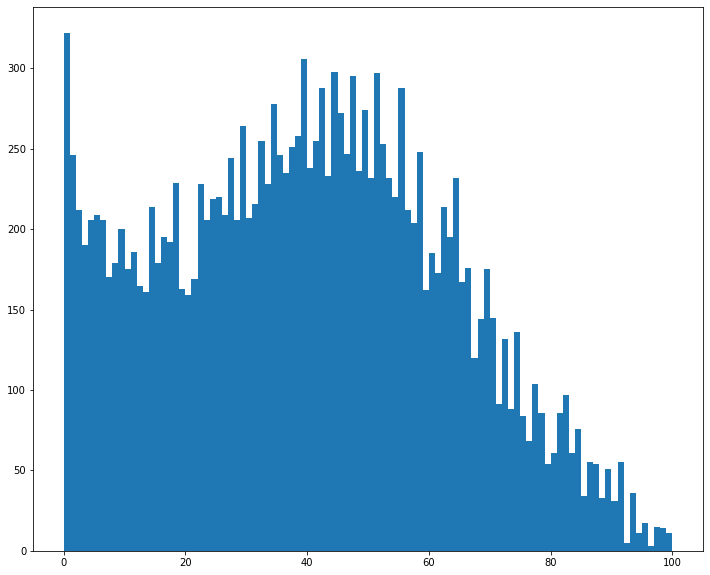

In [ ]:
genre_feats_pop = artists_data["popularity"]


fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(genre_feats_pop, bins=100)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[0.09656687 0.15903666 0.08339892 ... 0.08143399 0.12788319 0.08842307]


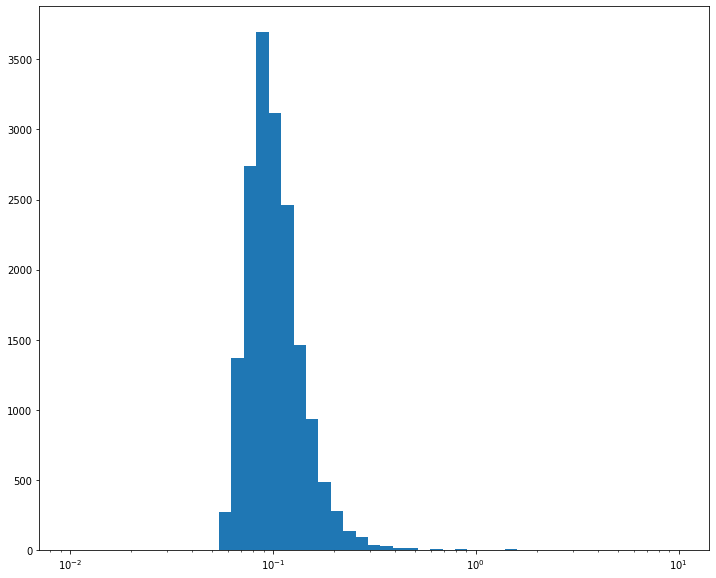

In [ ]:
genre_feats_fol = artists_data["followers"]
arr = np.array(genre_feats_fol)
log_arr = 1/np.log(arr)
print(log_arr)
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(log_arr, bins = 10 ** np.linspace(np.log10(0.01), np.log10(10.0), 50))
plt.gca().set_xscale("log")
fig.show()